<a href="https://colab.research.google.com/github/vilsonrodrigues/RecommendationSystem/blob/master/Apriori_Groceries_Market_Basket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste notebook, a tentativa foi usar o algoritmo apriori para prever quais são produtos são comprados juntos

### O algoritmo Apriori

Passos:

1. Calcular o suporte: contabiliza quantas vezes cada item aparece por amostra, depois dividir o montante pelo total de amostras. Definir um suporte mínimo, afim de não ficar analisando itens que vendem pouco, diminuindo o número de cálculos

2. Com os itens restantes e com K = 2 agora vamos combinar os itens 2 a 2. Pega quando os 2 itens estão juntos e dividi pelo total de amostras. Novamente, com o suporte mínimo, elimina da tabela as combinações 2 a 2 que são abaixo do dele

3. Agora com o K = 3, com combinações 3 a 3 com os itens que restaram da etapa anterior, contabiliza as ocorrências e divide pelo total de amostras

4. Assim por diante dependendo do seu conjunto de dados

5. Passo seguinte é fazer a verificação, se compra x produto, compra y + z?

6. O último passo é o de Lift, onde é feito o cálculo dos dois elementos dividos pelo produto do suporte dos dois produtos. Quanto L > 1 maior a relação de compra entre os dois produto, se L < 1, menos. O Lift passa a ser interessante pois considera o volume que isso acontenceu. Se um produto vende muito faltamente ele vai ter uma correlação com vários outros que saem poucas vezes 

### Importações

Libs

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
#import scklearn. ...

### Leitura e Entendimento dos Dados

A [base de dados](https://www.kaggle.com/irfanasrullah/groceries) foi extraída do Kaggle. Ela remete a compras em um supermercado. 

In [16]:
df = pd.read_csv('/content/groceries - groceries.csv')

In [6]:
df.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset com 9835 amostras e segundo a descrição no Kaggle, 169 produtos únicos. A primeira coluna contêm o número de produtos na compra. As compras tem até 32 itens em uma mesma feira

Existe muitos NaNs já que não são todas as compras com 32 itens, necessário tirar

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

### Visualização de dados

Com o violiplot podemos ver que a maioria das compras está feita com poucos itens, sendo raras as ocorrências com mais de 20

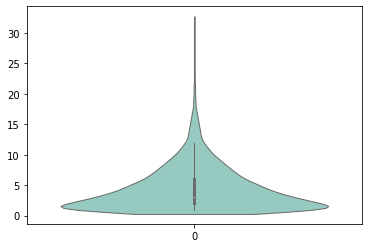

In [10]:
sns.violinplot(data = df['Item(s)'], palette="Set3", bw=.2, cut=1, linewidth=1)

### Pré-Processamento

Substituindo o NaN por 0

In [18]:
df = df.fillna(0)

In [19]:
df.head(2)

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,tropical fruit,yogurt,coffee,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Apagando a coluna de total de itens, se torna desncessária

In [49]:
df2 = df.iloc[:,1:].copy()

In [50]:
df2.head(2)

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tropical fruit,yogurt,coffee,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Convertendo o dataframe em lista para deixar de considerar os 0s em compras que não tem 32 itens

In [73]:
list_itens = df2.values.tolist()

Excluindo os 0s

In [76]:
list_sales = []
for lista in list_itens:
  list_sales.append(list(filter(lambda x: x != 0, lista)))  

In [78]:
list_sales[0]

['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']

### MLXTEND

Instalando MLxtend

In [ ]:
!pip install mlxtend

Importando o encoder da mlxtend

In [83]:
from mlxtend.preprocessing import TransactionEncoder

In [84]:
te = TransactionEncoder()

Aplicando o encoder. Onde agora, cada instancia de produto virará uma coluna que terá 1 se ocorrer nessa compra e 0 se não

In [85]:
te_ary = te.fit(list_sales).transform(list_sales)

In [86]:
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Voltando para dataframe

In [87]:
df_sales = pd.DataFrame(te_ary, columns = te.columns_)
df_sales.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,...,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


Importando o Apriori 

In [88]:
from mlxtend.frequent_patterns import apriori

Produtos com suporte mínimo maior que 0.01

In [99]:
frequents_itemsets =  apriori(df_sales, min_support = 0.01, use_colnames = True)

In [100]:
frequents_itemsets.sort_values(by = ['support'], ascending = False)

,support,itemsets
86,0.255516,(whole milk)
55,0.193493,(other vegetables)
66,0.183935,(rolls/buns)
75,0.174377,(soda)
87,0.139502,(yogurt)
...,...,...
178,0.010066,"(sausage, frankfurter)"
306,0.010066,"(whole milk, yogurt, curd)"
160,0.010066,"(rolls/buns, curd)"
212,0.010066,"(napkins, tropical fruit)"


Importando as regras de associação

In [101]:
from mlxtend.frequent_patterns import association_rules

Exemplo de leitura dos dados a seguir: com o lift acima de 1, 58% das pessoas que compraram citrus fruit and root vegetables compraram other vegetables

In [103]:
rules = association_rules(frequents_itemsets, metric = 'confidence', min_threshold = 0.5)
rules.sort_values(by = ['lift'], ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
6,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
5,"(rolls/buns, root vegetables)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792
7,"(yogurt, root vegetables)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,0.007916,1.613015
2,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
0,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
11,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553
12,"(root vegetables, yogurt)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594
3,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694
14,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719


Ao final desse notebook, vemos a utilidade do Apriori e das Regras de Associação que se tornam excelentes estratégias de vendas de produtos, já que você pode passar a agrupar produtos que saem muito juntos, mais perto, assim aumentando o número de vendas, ou até mesmo descobrindo combinações que não se esperava.